In [2]:
%matplotlib notebook

import pandas as pd
import json
from scipy import stats
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("lgg_gbm_gene_exp.csv", index_col=0)

genes = json.load(open("genes.json"))

for gene in genes:
    df[gene] = pd.to_numeric(df[gene], errors="coerce")

In [28]:
gcimp_p = ["LGm1", "LGm2", "LGm3"]
gcimp_n = ["LGm4", "LGm5", "LGm6"]

gbm = df[df["Study"]=="Glioblastoma multiforme"]
lgg = df[df["Study"]=="Brain Lower Grade Glioma"]

gbm_gcimp_p = gbm[gbm["Pan-Glioma DNA Methylation Cluster"].isin(gcimp_p)]
gbm_gcimp_n = gbm[gbm["Pan-Glioma DNA Methylation Cluster"].isin(gcimp_n)]

lgg_gcimp_p = lgg[lgg["Pan-Glioma DNA Methylation Cluster"].isin(gcimp_p)]
lgg_gcimp_n = lgg[lgg["Pan-Glioma DNA Methylation Cluster"].isin(gcimp_n)]

print "Total number of cases: ", len(df)
print
print "GBM number of cases: ", len(gbm)
print "LGG number of cases: ", len(lgg)
print
print "GBM GCIMP+ number of cases: ", len(gbm_gcimp_p)
print "GBM GCIMP- number of cases: ", len(gbm_gcimp_n)
print "LGG GCIMP+ number of cases: ", len(lgg_gcimp_p)
print "LGG GCIMP- number of cases: ", len(lgg_gcimp_n)

Total number of cases:  632

GBM number of cases:  595
LGG number of cases:  27

GBM GCIMP+ number of cases:  31
GBM GCIMP- number of cases:  368
LGG GCIMP+ number of cases:  25
LGG GCIMP- number of cases:  2


In [29]:
gbm_stats = {}
for gene in genes:
    gbm_stats[gene] = stats.ttest_ind(gbm_gcimp_p[gene], gbm_gcimp_n[gene])

significant_gbm = [x for x in gbm_stats.items() if x[1][1] <= 0.05]
len(significant_gbm)

8415

In [30]:
lgg_stats = {}
for gene in genes:
    lgg_stats[gene] = stats.ttest_ind(lgg_gcimp_p[gene], lgg_gcimp_n[gene])

significant_lgg = [x for x in lgg_stats.items() if x[1][1] <= 0.05]
len(significant_lgg)

1617

In [31]:
gbm_genes = [x[0] for x in significant_gbm]
lgg_genes = [x[0] for x in significant_lgg]
shared_genes = [g for g in lgg_genes if g in gbm_genes]
len(shared_genes)

1055

<IPython.core.display.Javascript object>


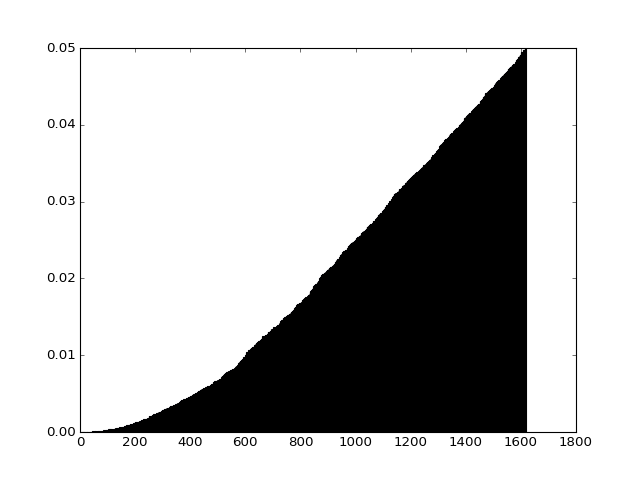

<IPython.core.display.Javascript object>


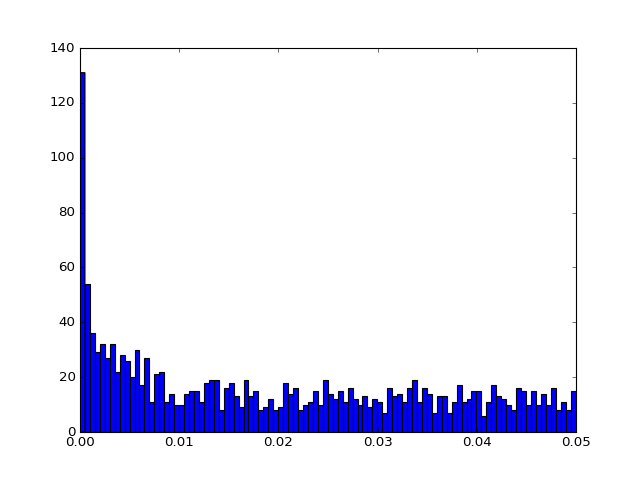

In [34]:
# print [x[1][1] for x in significant_lgg][:10]
plt.figure()
plt.bar(range(len([x[0] for x in significant_lgg])), [x[1][1] for x in significant_lgg])
plt.show()

plt.figure()
plt.hist([x[1][1] for x in significant_lgg], bins=100)
plt.show()

In [33]:
significant_lgg.sort(key=lambda x: x[1][1])
# print significant_lgg[:10]

significant_gbm.sort(key=lambda x: x[1][1])
# print significant_gbm[:10]

top100significant_lgg = [gene[0] for gene in significant_lgg][:1000]
top100significant_gbm = [gene[0] for gene in significant_gbm][:1000]

top_sig = list(set(top100significant_lgg).intersection(set(top100significant_gbm)))
len(top_sig)

222

In [36]:
high_statistic_gbm = sorted(significant_gbm, key=lambda x: x[1][0])
high_statistic_lgg = sorted(significant_lgg, key=lambda x: x[1][0])

top_high_statistic_gbm = [gene[0] for gene in high_statistic_gbm][:1000]
top_high_statistic_lgg = [gene[0] for gene in high_statistic_lgg][:1000]

top_statistic = list(set(top_high_statistic_gbm).intersection(set(top_high_statistic_lgg)))
print len(top_statistic)
top_statistic[:10]

241


[u'FKBP9L',
 u'WISP1',
 u'KCNE4',
 u'ATP5J2',
 u'NPEPL1',
 u'FBXO17',
 u'CHMP2A',
 u'CHI3L1',
 u'DUSP23',
 u'FKBP9']

<IPython.core.display.Javascript object>


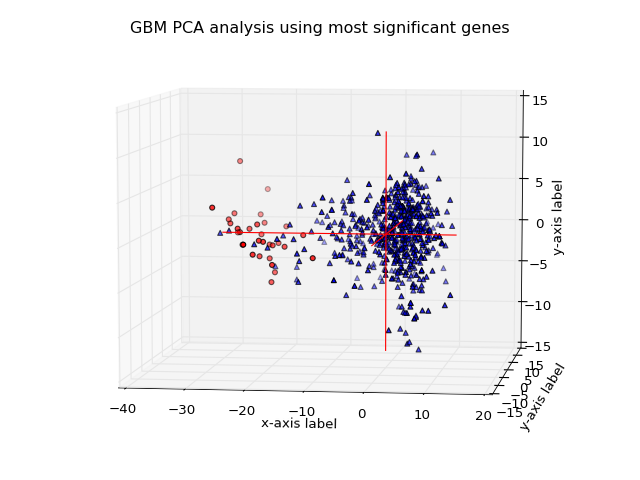

In [37]:
myData_st_gbm = gbm[top_statistic].as_matrix() 
myData_st_gbm = myData_st_gbm[~numpy.isnan(myData_st_gbm).any(axis=1)]
results_st_gbm = PCA(myData_st_gbm) 

#this will return an array of variance percentages for each component
results_st_gbm.fracs

#this will return a 2d array of the data projected into PCA space
results_st_gbm.Y

x_st_gbm = []
y_st_gbm = []
z_st_gbm = []
for item in results_st_gbm.Y:
    x_st_gbm.append(item[0])
    y_st_gbm.append(item[1])
    z_st_gbm.append(item[2])

x1_st_gbm = []
y1_st_gbm = []
z1_st_gbm = []

x2_st_gbm = []
y2_st_gbm = []
z2_st_gbm = []

for i in range(len(results_st_gbm.Y)):
    item = results_st_gbm.Y[i]
    if gbm["Pan-Glioma DNA Methylation Cluster"][i] in gcimp_p:
        x1_st_gbm.append(item[0])
        y1_st_gbm.append(item[1])
        z1_st_gbm.append(item[2])
    else:
        x2_st_gbm.append(item[0])
        y2_st_gbm.append(item[1])
        z2_st_gbm.append(item[2])

plt.close('all') # close all latent plotting windows
fig3 = plt.figure() # Make a plotting figure
ax = Axes3D(fig3) # use the plotting figure to create a Axis3D object.
pltData_st_gbm = [x_st_gbm,y_st_gbm,z_st_gbm]
# pltData1 = [x1,y1,z1]
# pltData2 = [x2,y2,z2]
ax.scatter(x1_st_gbm, y1_st_gbm, z1_st_gbm, 'bo', c='r', marker='o') # make a scatter plot of blue dots from the data
ax.scatter(x2_st_gbm, y2_st_gbm, z2_st_gbm, 'rx', c='b', marker='^') # make a scatter plot of red dots from the data
 
# make simple, bare axis lines through space:
xAxisLine = ((min(pltData_st_gbm[0]), max(pltData_st_gbm[0])), (0, 0), (0,0)) # 2 points make the x-axis line at the data extrema along x-axis 
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r') # make a red line for the x-axis.
yAxisLine = ((0, 0), (min(pltData_st_gbm[1]), max(pltData_st_gbm[1])), (0,0)) # 2 points make the y-axis line at the data extrema along y-axis
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r') # make a red line for the y-axis.
zAxisLine = ((0, 0), (0,0), (min(pltData_st_gbm[2]), max(pltData_st_gbm[2]))) # 2 points make the z-axis line at the data extrema along z-axis
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r') # make a red line for the z-axis.

# label the axes 
ax.set_xlabel("x-axis label") 
ax.set_ylabel("y-axis label")
ax.set_zlabel("y-axis label")
ax.set_title("GBM PCA analysis using most significant genes")
plt.show() # show the plot

In [12]:
from matplotlib.mlab import PCA
import numpy
#construct your numpy array of data
myData = gbm[top_sig].as_matrix() 
myData = myData[~numpy.isnan(myData).any(axis=1)]
results = PCA(myData) 

#this will return an array of variance percentages for each component
results.fracs

#this will return a 2d array of the data projected into PCA space
results.Y

array([[  7.50126402,  -1.57127694,  -0.25785189, ...,   0.2260715 ,
         -0.01610155,   0.12245082],
       [ -6.67201932,   3.13365671,   3.40408841, ...,  -0.26294236,
         -0.05433824,  -0.07591573],
       [ -5.65175075,  -2.45110833,   3.61736345, ...,   0.20738022,
         -0.06795179,   0.11360536],
       ..., 
       [ 10.15931158,  -6.38814929,  -3.86440464, ...,  -0.20040783,
          0.27390884,  -0.06485238],
       [ -5.3279244 ,  -1.54585078,  -1.07029456, ...,  -0.0749202 ,
          0.06461345,  -0.15680947],
       [ -8.89836563,  -1.40892411,   0.94425891, ...,   0.10945813,
          0.18083112,  -0.12856753]])

<IPython.core.display.Javascript object>


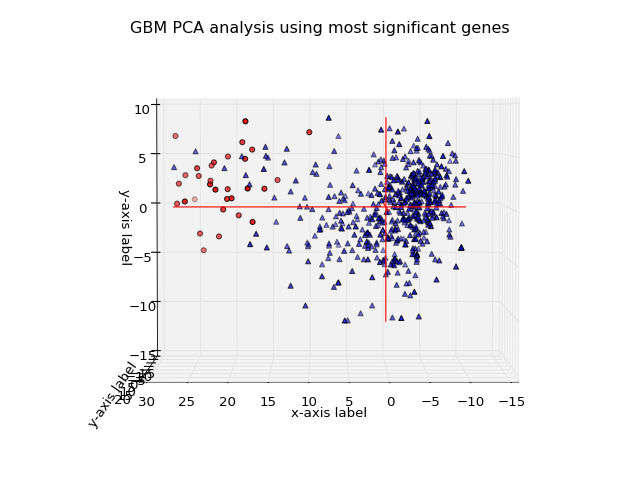

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = []
y = []
z = []
for item in results.Y:
    x.append(item[0])
    y.append(item[1])
    z.append(item[2])

x1 = []
y1 = []
z1 = []

x2 = []
y2 = []
z2 = []

for i in range(len(results.Y)):
    item = results.Y[i]
    if gbm["Pan-Glioma DNA Methylation Cluster"][i] in gcimp_p:
        x1.append(item[0])
        y1.append(item[1])
        z1.append(item[2])
    else:
        x2.append(item[0])
        y2.append(item[1])
        z2.append(item[2])

plt.close('all') # close all latent plotting windows
fig1 = plt.figure() # Make a plotting figure
ax = Axes3D(fig1) # use the plotting figure to create a Axis3D object.
pltData = [x,y,z]
# pltData1 = [x1,y1,z1]
# pltData2 = [x2,y2,z2]
ax.scatter(x1, y1, z1, 'bo', c='r', marker='o') # make a scatter plot of blue dots from the data
ax.scatter(x2, y2, z2, 'rx', c='b', marker='^') # make a scatter plot of red dots from the data
 
# make simple, bare axis lines through space:
xAxisLine = ((min(pltData[0]), max(pltData[0])), (0, 0), (0,0)) # 2 points make the x-axis line at the data extrema along x-axis 
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r') # make a red line for the x-axis.
yAxisLine = ((0, 0), (min(pltData[1]), max(pltData[1])), (0,0)) # 2 points make the y-axis line at the data extrema along y-axis
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r') # make a red line for the y-axis.
zAxisLine = ((0, 0), (0,0), (min(pltData[2]), max(pltData[2]))) # 2 points make the z-axis line at the data extrema along z-axis
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r') # make a red line for the z-axis.
 
# label the axes 
ax.set_xlabel("x-axis label") 
ax.set_ylabel("y-axis label")
ax.set_zlabel("y-axis label")
ax.set_title("GBM PCA analysis using most significant genes")
plt.show() # show the plot

In [24]:
#construct your numpy array of data
myData_lgg = lgg[top_sig[:27]].as_matrix() 
myData_lgg = myData_lgg[~numpy.isnan(myData_lgg).any(axis=1)]
results_lgg = PCA(myData_lgg) 

#this will return an array of variance percentages for each component
results_lgg.fracs

#this will return a 2d array of the data projected into PCA space
results_lgg.Y

array([[  1.07307883e+00,   9.08845611e-01,   1.05499306e+00,
         -1.18129602e+00,   3.31696530e-01,  -3.67753034e-01,
         -1.05100079e+00,   1.08073952e-01,   5.79028414e-01,
          5.28154392e-01,   1.07960704e+00,  -3.83924043e-01,
          8.71116777e-01,  -5.93201226e-01,  -6.84665772e-01,
         -6.64606343e-01,  -5.95454367e-01,   3.71155851e-01,
         -2.46172884e-01,  -5.48139652e-01,   8.25609075e-02,
          2.53380767e-01,   1.50590613e-01,  -1.25493493e-01,
         -5.85847954e-02,  -3.00883426e-02,   3.33066907e-16],
       [ -1.81354694e+00,  -5.87686980e+00,  -1.60089471e+00,
         -1.48112499e-03,  -5.70045853e-01,  -7.95453096e-01,
          7.74047925e-01,   9.16206710e-02,  -8.43480033e-02,
         -1.03882248e+00,   5.18007437e-01,   2.35718597e-01,
          1.23618207e+00,   6.65604020e-01,   3.79442789e-01,
         -8.14677985e-02,  -1.72699302e-01,  -3.05776986e-01,
          4.37930682e-02,  -1.91399354e-01,  -2.58880186e-01,
       

<IPython.core.display.Javascript object>


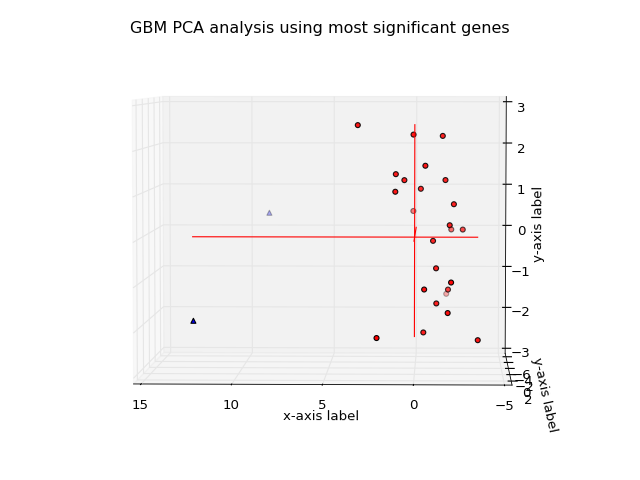

In [25]:
x_lgg = []
y_lgg = []
z_lgg = []
for item in results_lgg.Y:
    x_lgg.append(item[0])
    y_lgg.append(item[1])
    z_lgg.append(item[2])

x1_lgg = []
y1_lgg = []
z1_lgg = []

x2_lgg = []
y2_lgg = []
z2_lgg = []

for i in range(len(results_lgg.Y)):
    item = results_lgg.Y[i]
    if lgg["Pan-Glioma DNA Methylation Cluster"][i] in gcimp_p:
        x1_lgg.append(item[0])
        y1_lgg.append(item[1])
        z1_lgg.append(item[2])
    else:
        x2_lgg.append(item[0])
        y2_lgg.append(item[1])
        z2_lgg.append(item[2])

plt.close('all') # close all latent plotting windows
fig2 = plt.figure() # Make a plotting figure
ax = Axes3D(fig2) # use the plotting figure to create a Axis3D object.
pltData_lgg = [x_lgg,y_lgg,z_lgg]
# pltData1 = [x1,y1,z1]
# pltData2 = [x2,y2,z2]
ax.scatter(x1_lgg, y1_lgg, z1_lgg, 'bo', c='r', marker='o') # make a scatter plot of blue dots from the data
ax.scatter(x2_lgg, y2_lgg, z2_lgg, 'rx', c='b', marker='^') # make a scatter plot of red dots from the data
 
# make simple, bare axis lines through space:
xAxisLine = ((min(pltData_lgg[0]), max(pltData_lgg[0])), (0, 0), (0,0)) # 2 points make the x-axis line at the data extrema along x-axis 
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r') # make a red line for the x-axis.
yAxisLine = ((0, 0), (min(pltData_lgg[1]), max(pltData_lgg[1])), (0,0)) # 2 points make the y-axis line at the data extrema along y-axis
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r') # make a red line for the y-axis.
zAxisLine = ((0, 0), (0,0), (min(pltData_lgg[2]), max(pltData_lgg[2]))) # 2 points make the z-axis line at the data extrema along z-axis
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r') # make a red line for the z-axis.
 
# label the axes 
ax.set_xlabel("x-axis label") 
ax.set_ylabel("y-axis label")
ax.set_zlabel("y-axis label")
ax.set_title("GBM PCA analysis using most significant genes")
plt.show() # show the plot